<svg width="108" height="108" viewBox="0 0 108 108" fill="none" xmlns="http://www.w3.org/2000/svg">
<g filter="url(#filter0_d)">
<circle cx="54" cy="50" r="50" fill="#121068"/>
</g>
<circle cx="54.5" cy="50.5" r="37.5" fill="#F2F2F2"/>
<circle cx="54" cy="50" r="25" fill="#56CCF2"/>
<circle cx="54.5" cy="50.5" r="12.5" fill="#333333"/>
<defs>
<filter id="filter0_d" x="0" y="0" width="108" height="108" filterUnits="userSpaceOnUse" color-interpolation-filters="sRGB">
<feFlood flood-opacity="0" result="BackgroundImageFix"/>
<feColorMatrix in="SourceAlpha" type="matrix" values="0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 127 0" result="hardAlpha"/>
<feOffset dy="4"/>
<feGaussianBlur stdDeviation="2"/>
<feComposite in2="hardAlpha" operator="out"/>
<feColorMatrix type="matrix" values="0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.25 0"/>
<feBlend mode="normal" in2="BackgroundImageFix" result="effect1_dropShadow"/>
<feBlend mode="normal" in="SourceGraphic" in2="effect1_dropShadow" result="shape"/>
</filter>
</defs>
</svg>
<hr style="margin-bottom: 40px;">
<img src="https://media.tacdn.com/media/attractions-splice-spp-674x446/07/9d/d9/89.jpg"
style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>


# Predicting football ⚽ draw results in major european leagues. 
## Belgium 1st Division case study
**Nostradam Predictions is a data science driven 🔢 algorithm 🤖 built to predict football ⚽ draw results.<br>
This project is only the kick-off 😉 of a greater journey with more ventures coming in the future 🔮.**

For more details feel free to explore my [Github]("https://github.com/adamlouafi/nostradam_predictions")


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



## Part 1: Purpose
* Find correlations between matches results and several variables
* Find recurring patterns
* Build a prediction model based on data science

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




## Part 2: Data
* Data provided by **[Football-Data.co.uk]("https://www.football-data.co.uk/")** ❤
* Data in CSV format
* Data for the season 2020-2021

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Part 3: Data cleaning

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

> _[Pandas]("https://pandas.pydata.org/docs/") is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language._  
_[NumPy]("https://numpy.org/doc/stable/")  is an open source project aiming to enable numerical computing with Python._

In [2]:
col_list = ['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'PSH', 'PSD', 'PSA', 'P>2.5', 'P<2.5']
df = pd.read_csv('db/2020-2021/B1.csv', usecols=col_list, parse_dates=[['Date', 'Time']])

>For more details about the data structure read the data documentation [here]("https://www.football-data.co.uk/notes.txt")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date_Time  306 non-null    datetime64[ns]
 1   HomeTeam   306 non-null    object        
 2   AwayTeam   306 non-null    object        
 3   FTHG       306 non-null    int64         
 4   FTAG       306 non-null    int64         
 5   FTR        306 non-null    object        
 6   HTHG       306 non-null    int64         
 7   HTAG       306 non-null    int64         
 8   HTR        306 non-null    object        
 9   PSH        305 non-null    float64       
 10  PSD        305 non-null    float64       
 11  PSA        305 non-null    float64       
 12  P>2.5      305 non-null    float64       
 13  P<2.5      305 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(4)
memory usage: 33.6+ KB


In [4]:
df.head()

,Date_Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,PSH,PSD,PSA,P>2.5,P<2.5
0,2020-08-08 15:30:00,Club Brugge,Charleroi,0,1,A,0,0,D,1.53,4.13,6.81,1.93,1.90
1,2020-08-08 18:00:00,Antwerp,Mouscron,1,1,D,0,0,D,1.32,5.34,10.09,1.72,2.17
2,2020-08-08 18:00:00,Standard,Cercle Brugge,1,0,H,0,0,D,1.43,4.75,7.44,1.72,2.18
3,2020-09-08 12:30:00,St Truiden,Gent,2,1,H,1,1,D,4.54,4.19,1.72,1.56,2.47
4,2020-09-08 15:00:00,Waregem,Genk,1,2,A,1,0,H,3.65,3.91,1.97,1.53,2.57


In [5]:
df.isnull().sum() # output number of null values for each column

Date_Time    0
HomeTeam     0
AwayTeam     0
FTHG         0
FTAG         0
FTR          0
HTHG         0
HTAG         0
HTR          0
PSH          1
PSD          1
PSA          1
P>2.5        1
P<2.5        1
dtype: int64

In [6]:
df = df.dropna() # drop rows with null values from dataframe

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Part 4: Data analysis

In [7]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,PSH,PSD,PSA,P>2.5,P<2.5
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,1.547541,1.445902,0.652459,0.583607,2.662557,4.014131,3.895869,1.726164,2.223902
std,1.205198,1.204921,0.792980,0.769736,1.446824,0.736839,2.522484,0.156140,0.260277
min,0.000000,0.000000,0.000000,0.000000,1.130000,3.130000,1.200000,1.380000,1.710000
25%,1.000000,1.000000,0.000000,0.000000,1.780000,3.590000,2.250000,1.610000,2.030000
50%,1.000000,1.000000,0.000000,0.000000,2.240000,3.820000,3.210000,1.720000,2.160000
75%,2.000000,2.000000,1.000000,1.000000,3.170000,4.180000,4.500000,1.830000,2.380000
max,6.000000,7.000000,5.000000,4.000000,15.040000,9.290000,23.780000,2.230000,3.090000


In [8]:
df.corrwith(df['FTR'] == 'D')

FTHG    -0.177083
FTAG    -0.131010
HTHG    -0.095255
HTAG    -0.130399
PSH     -0.050086
PSD     -0.011332
PSA      0.040803
P>2.5    0.032437
P<2.5   -0.043001
dtype: float64

**Games that ended with a draw** 👇

In [9]:
df.loc[df['FTR'] =='D']

,Date_Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,PSH,PSD,PSA,P>2.5,P<2.5
1,2020-08-08 18:00:00,Antwerp,Mouscron,1,1,D,0,0,D,1.32,5.34,10.09,1.72,2.17
5,2020-09-08 17:15:00,Mechelen,Anderlecht,2,2,D,0,0,D,4.33,3.60,1.89,1.81,2.02
7,2020-10-08 18:00:00,Oud-Heverlee Leuven,Eupen,1,1,D,0,0,D,2.40,3.56,2.92,1.85,1.97
10,2020-08-15 15:30:00,Genk,Oud-Heverlee Leuven,1,1,D,0,0,D,1.27,6.00,11.37,1.60,2.39
18,2020-08-21 18:00:00,Kortrijk,Eupen,0,0,D,0,0,D,2.37,3.42,3.06,1.85,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2021-12-03 19:45:00,Charleroi,Club Brugge,1,1,D,0,1,A,7.34,4.08,1.52,1.87,2.00
270,2021-03-19 19:45:00,Genk,Standard,2,2,D,0,0,D,2.14,3.65,3.42,1.87,2.01
274,2021-03-21 15:00:00,Mechelen,Oud-Heverlee Leuven,2,2,D,1,1,D,1.84,3.94,4.09,1.68,2.23
282,2021-04-04 19:45:00,Charleroi,Mouscron,1,1,D,0,0,D,1.85,3.67,4.39,2.05,1.81


### Example with some values

**Draw results statistical description** 👇

In [10]:
df.loc[df['FTR'] == 'D'].describe()

,FTHG,FTAG,HTHG,HTAG,PSH,PSD,PSA,P>2.5,P<2.5
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,1.157143,1.157143,0.514286,0.400000,2.530000,3.998857,4.084143,1.735429,2.203429
std,0.878664,0.878664,0.675511,0.521981,1.370174,0.650357,2.363562,0.144008,0.234502
min,0.000000,0.000000,0.000000,0.000000,1.270000,3.300000,1.360000,1.450000,1.810000
25%,1.000000,1.000000,0.000000,0.000000,1.767500,3.600000,2.535000,1.622500,2.030000
50%,1.000000,1.000000,0.000000,0.000000,2.155000,3.795000,3.415000,1.720000,2.160000
75%,2.000000,2.000000,1.000000,1.000000,2.805000,4.140000,4.675000,1.847500,2.370000
max,5.000000,5.000000,2.000000,2.000000,9.170000,6.170000,11.600000,2.060000,2.830000


**Over 2.5 (3 goals or more in the match) statistical description** 👇

In [11]:
df.loc[df['FTHG'] + df['FTAG'] >= 2.5].describe()

,FTHG,FTAG,HTHG,HTAG,PSH,PSD,PSA,P>2.5,P<2.5
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,2.070270,1.935135,0.891892,0.767568,2.668973,4.018324,3.817784,1.711081,2.249351
std,1.184333,1.223017,0.859214,0.843793,1.270909,0.765770,2.610012,0.156086,0.265048
min,0.000000,0.000000,0.000000,0.000000,1.130000,3.130000,1.410000,1.380000,1.710000
25%,1.000000,1.000000,0.000000,0.000000,1.790000,3.600000,2.240000,1.590000,2.050000
50%,2.000000,2.000000,1.000000,1.000000,2.260000,3.840000,3.120000,1.710000,2.200000
75%,3.000000,3.000000,1.000000,1.000000,3.190000,4.220000,4.500000,1.810000,2.440000
max,6.000000,7.000000,5.000000,4.000000,8.610000,9.290000,23.780000,2.230000,3.090000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Part 5: Data visualization
For this part we will be using two great data visualization libraries called [Matplotlib]("https://matplotlib.org/") and [Seaborn]("https://seaborn.pydata.org/")

In [12]:
df.head()

,Date_Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,PSH,PSD,PSA,P>2.5,P<2.5
0,2020-08-08 15:30:00,Club Brugge,Charleroi,0,1,A,0,0,D,1.53,4.13,6.81,1.93,1.90
1,2020-08-08 18:00:00,Antwerp,Mouscron,1,1,D,0,0,D,1.32,5.34,10.09,1.72,2.17
2,2020-08-08 18:00:00,Standard,Cercle Brugge,1,0,H,0,0,D,1.43,4.75,7.44,1.72,2.18
3,2020-09-08 12:30:00,St Truiden,Gent,2,1,H,1,1,D,4.54,4.19,1.72,1.56,2.47
4,2020-09-08 15:00:00,Waregem,Genk,1,2,A,1,0,H,3.65,3.91,1.97,1.53,2.57


Let's start with Matplotlib and see what we can get !

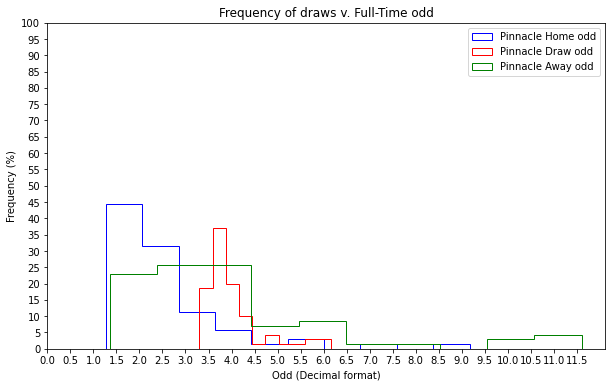

In [13]:
draws_df = df[df['FTR'] == 'D']

plt.figure(figsize=(10,6))
plt.hist(draws_df['PSH'], weights=np.ones(len(draws_df))/ len(draws_df) * 100, histtype='step',color='blue') # weights formula = 1/number_of_draws * 100
plt.hist(draws_df['PSD'], weights=np.ones(len(draws_df))/ len(draws_df) * 100, histtype='step',color='red')
plt.hist(draws_df['PSA'], weights=np.ones(len(draws_df))/ len(draws_df) * 100, histtype='step',color='green')
plt.xticks(np.arange(0, 12, .5))
plt.yticks(np.arange(0, 101, 5))

plt.title('Frequency of draws v. Full-Time odd')
plt.xlabel('Odd (Decimal format)')
plt.ylabel('Frequency (%)')
plt.legend(['Pinnacle Home odd', 'Pinnacle Draw odd', 'Pinnacle Away odd'])

plt.show()

Unfortunately graphical interpretation doesn't tell us much about repartition. For this purpose we will be plotting a hex jointplot
>[Seaborn]("https://seaborn.pydata.org/") is a Python data visualization library based on matplotlib.

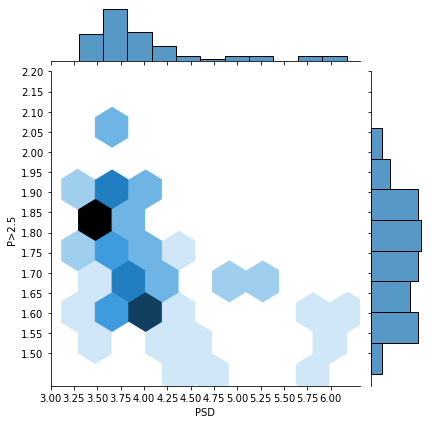

In [14]:
g = sns.jointplot(x='PSD', y='P>2.5', data=draws_df, kind='hex')
g.ax_joint.set_xticks(np.arange(3,6.25,.25))
g.ax_joint.set_yticks(np.arange(1.5,2.25,.05))

This plot gives us as expected far more information. We can interpret that the frequency of draws is higher when  3.25 <= PSD <= 4.00 and 1.8 <= P>2.5 <= 1.95.
However we need to confirm this by backtesting those filters

In [15]:
eligible_matches = df[(df['PSD'] >=3.25) & (df['PSD'] <=4) & (df['P>2.5'] >=1.8) & (df['P>2.5'] <=1.95)]
winning_matches = draws_df[(draws_df['PSD'] >=3.25) & (draws_df['PSD'] <=4) & (draws_df['P>2.5'] >=1.8) & (draws_df['P>2.5'] <=1.95)]
winrate = round(winning_matches.count()[0]/eligible_matches.count()[0], 2)
print(f'{winrate * 100}%')

36.0%


In [16]:
winning_matches.describe()

,FTHG,FTAG,HTHG,HTAG,PSH,PSD,PSA,P>2.5,P<2.5
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.095238,1.095238,0.476190,0.333333,2.732857,3.614286,3.190952,1.869524,1.999048
std,0.700340,0.700340,0.511766,0.483046,1.050429,0.173366,1.073904,0.045440,0.046250
min,0.000000,0.000000,0.000000,0.000000,1.680000,3.340000,1.750000,1.810000,1.910000
25%,1.000000,1.000000,0.000000,0.000000,2.120000,3.530000,2.100000,1.840000,1.970000
50%,1.000000,1.000000,0.000000,0.000000,2.240000,3.630000,3.290000,1.850000,2.010000
75%,2.000000,2.000000,1.000000,1.000000,3.630000,3.680000,3.550000,1.900000,2.030000
max,2.000000,2.000000,1.000000,1.000000,5.260000,3.920000,5.590000,1.950000,2.060000


With an average odd of 3.61 our selection criteria would have provided an 8% edge (Probability implied by 3.61 odd => 27.7%)

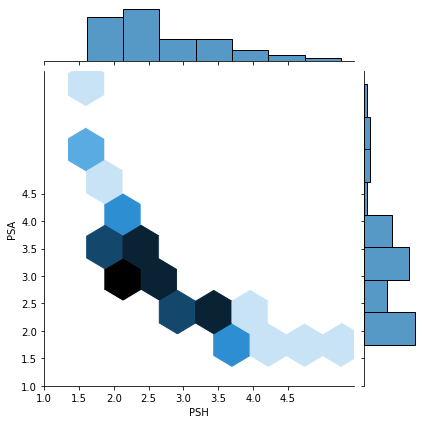

In [17]:
g = sns.jointplot(x='PSH', y='PSA', data=eligible_matches, kind='hex')
g.ax_joint.set_xticks(np.arange(1,5,.5))
g.ax_joint.set_yticks(np.arange(1,5,.5))

The above plot gives us insights about the home and away odds with the following reading: Draws are more frequent when 1.5 <= PSH <= 3.0 and 2.5 <= PSA <= 4.0. But as before we will have to confirm this by a calculation keeping in mind our previous criteria

In [18]:
eligible_matches = df[(df['PSD'] >=3.25) & (df['PSD'] <=4) & (df['P>2.5'] >=1.8) & (df['P>2.5'] <=1.95) & (df['PSH'] >=1.5) & (df['PSH'] <=3) & (df['PSA'] >=2.5) & (df['PSA'] <= 4)]
winning_matches = draws_df[(draws_df['PSD'] >=3.25) & (draws_df['PSD'] <=4) & (draws_df['P>2.5'] >=1.8) & (draws_df['P>2.5'] <=1.95) & (draws_df['PSH'] >=1.5) & (draws_df['PSH'] <=3) & (draws_df['PSA'] >=2.5) & (draws_df['PSA'] <= 4)]
winrate = round(winning_matches.count()[0]/eligible_matches.count()[0], 2)
print(f'{winrate * 100}%')

38.0%


In [19]:
winning_matches.describe()

,FTHG,FTAG,HTHG,HTAG,PSH,PSD,PSA,P>2.5,P<2.5
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.000000,1.000000,0.454545,0.181818,2.253636,3.536364,3.287273,1.860000,2.009091
std,0.774597,0.774597,0.522233,0.404520,0.169957,0.178957,0.262568,0.036056,0.036457
min,0.000000,0.000000,0.000000,0.000000,2.010000,3.340000,2.840000,1.810000,1.940000
25%,0.500000,0.500000,0.000000,0.000000,2.155000,3.375000,3.125000,1.845000,1.990000
50%,1.000000,1.000000,0.000000,0.000000,2.230000,3.560000,3.380000,1.850000,2.010000
75%,1.500000,1.500000,1.000000,0.000000,2.330000,3.645000,3.415000,1.870000,2.030000
max,2.000000,2.000000,1.000000,1.000000,2.640000,3.920000,3.700000,1.940000,2.060000


With an average odd of 3.54 our selection criteria would have provided a 10% edge (Probability implied by 3.54 odd => 28.2%)

## Conclusion
Throughout this case study about the [Belgian First Division A]("https://en.wikipedia.org/wiki/Belgian_First_Division_A") draws in the 2020-2021 season we have noticed some interesting facts highlighting the potential of draw betting in football. Indeed this outcome is often overlooked because of cognitive bias. However it is important to bear in mind the following:  
>Past performance is no guarantee of future results

Hope you found my paper insightful and do not hesitate to dive into my [other projects]("https://github.com/adamlouafi").